# Fuzzy

**Antecedentes (entradas)**

Serviço: que nota você daria para o serviço, em uma escala de 0 a 10?
- ruim, aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?
- ruim, boa, saborosa

**Consequentes (saídas)**

Gorjeta: quanta gorjeta você daria, entre 0% e 20%?
- baixa, média, alta

Regras
- Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será *baixa*
- Se o serviço for *médio* então a gorjeta será *média*
- Se o serviço for *bom* e a qualidade da comida for *saborosa* então a gorjeta será *alta*


### Imports

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Antecedentes e consequente

In [3]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [7]:
qualidade

Antecedent: qualidade

In [8]:
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [10]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

### Membership functions

In [11]:
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo'])

d:\Projetos\machine_learning\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


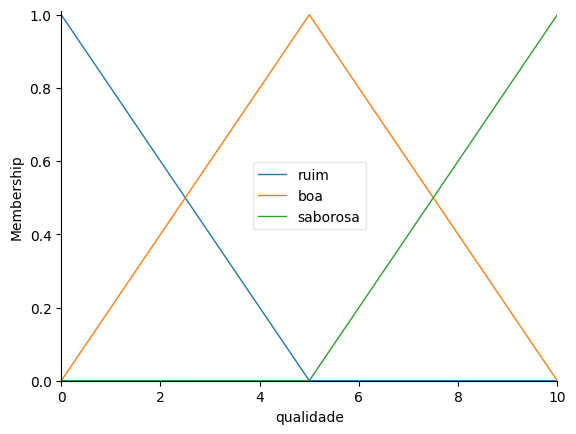

In [12]:
qualidade.view()

d:\Projetos\machine_learning\.venv\Lib\site-packages\skfuzzy\control\term.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


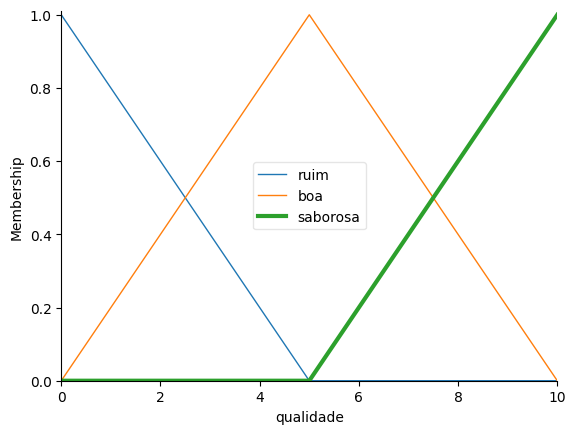

In [13]:
qualidade['saborosa'].view()

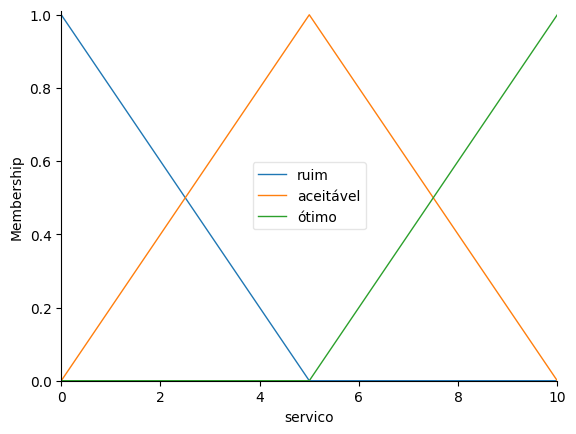

In [14]:
servico.view()

In [15]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [16]:
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 8])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [2, 10, 18])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [12, 20, 20])

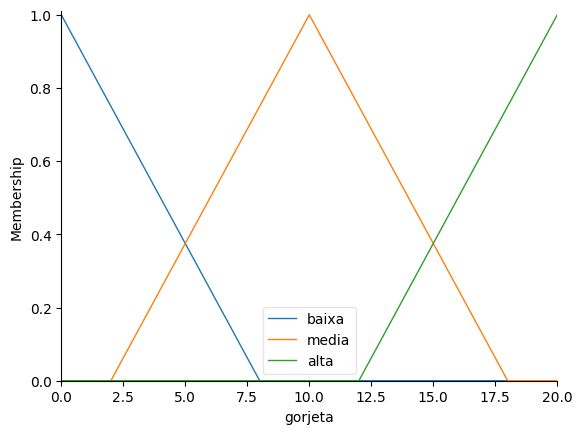

In [17]:
gorjeta.view()

In [18]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

### Sistema de controle

In [19]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [20]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [27]:
sistema.input['qualidade'] = 0
sistema.input['servico'] = 0
sistema.compute()

2.666666666666667


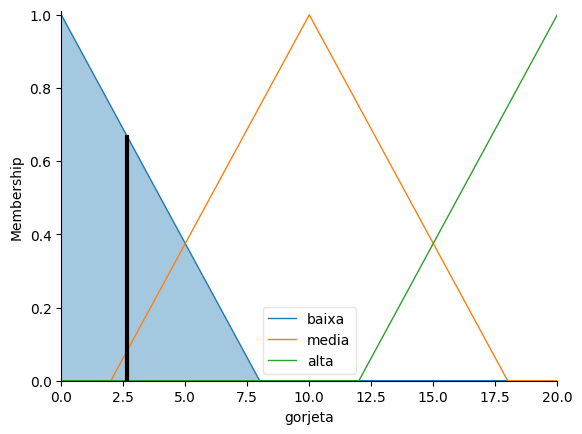

In [28]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)